In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Load the annotations into a `DataFrame`

In [2]:
df = pd.read_json('../annotations.json')

## Distribution of relation labels

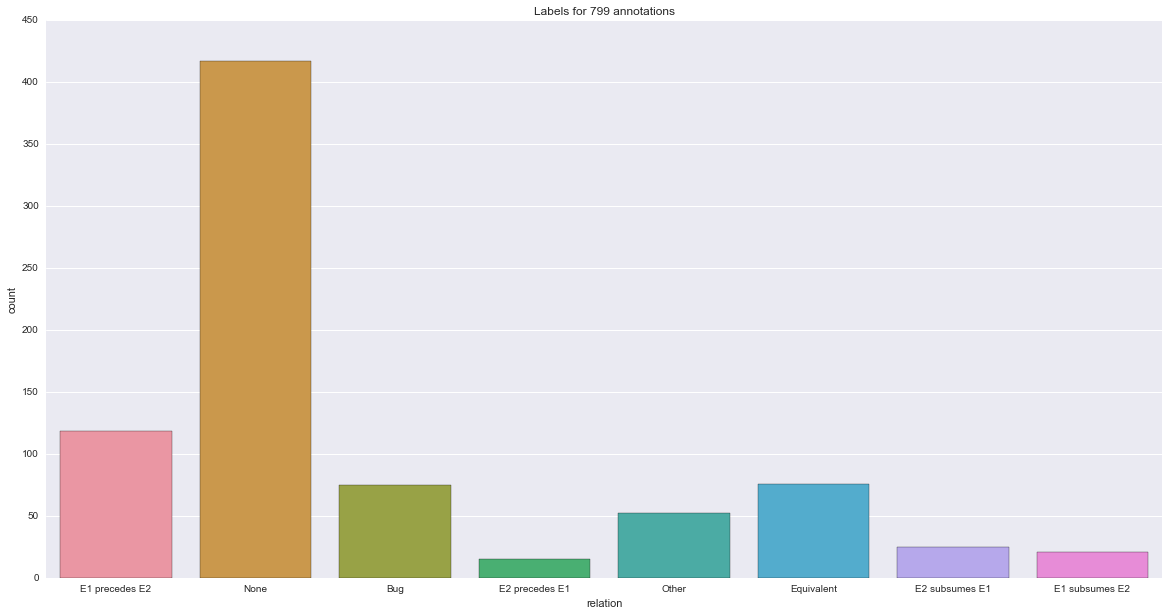

In [3]:
rel = "relation"
# only show the rows with a definitive annotation
non_empty = df[df[rel] != ""]
plt.figure(figsize=(20, 10))
sns.plt.title("Labels for {} annotations".format(len(non_empty)))
_ = sns.countplot(x="relation", data=non_empty)
#sns.plt.show()

## Distribution of relation labels (cont'd)

None              417
E1 precedes E2    118
Equivalent         76
Bug                75
Other              52
E2 subsumes E1     25
E1 subsumes E2     21
E2 precedes E1     15
Name: relation, dtype: int64


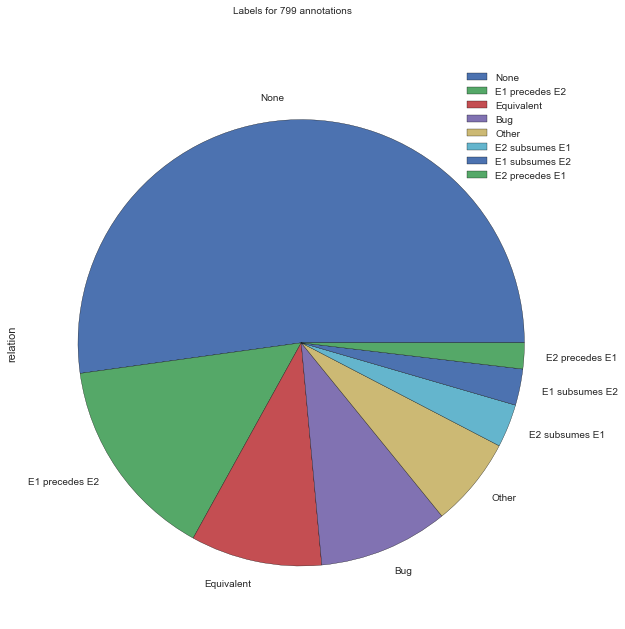

In [4]:
#relation_groups = non_empty.groupby(rel)
counts = non_empty[rel].value_counts()
print(counts)
_ = pd.DataFrame(counts).plot(kind='pie', 
                              subplots=True, 
                              figsize=(10, 10), 
                              title="Labels for {} annotations".format(len(non_empty))
                             )